# <center><div class="alert alert-block alert-danger"><b>Actividad Asig. Opción de grado</b><br></div></center></center>
## Taller: 
### Proyecto Incorporar Data desde Fuentes Externas (WebScrapping)
## Autor: Brayan Andrés Medina Correa

In [1]:
!pip install bs4
!pip install lxml
!pip install scrapy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


<div class="alert alert-block alert-success"><b>PASO 1: Importe de librerías</b><br></div>

In [ ]:
!pip install openpyxl
!pip install seaborn
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
web = requests.get('https://www.larebajavirtual.com/contenido/ver/tipo/grupo/contenido/17323?gclid=Cj0KCQjwvqeUBhCBARIsAOdt45ajJUhhFF3Dk9oHAwUAVAQUJYtgqo6K7RFW8DFqDKhHXpUM9P9LP-4aAsorEALw_wcB').text

In [ ]:
soup = BeautifulSoup(web, "html.parser")
print(soup.prettify())

In [ ]:
nombres =[]
for link in soup.find_all('a'):
    nombres.append(link.get('title'))

In [ ]:
res = [] 
for val in nombres: 
    if val != None : 
        res.append(val)

In [ ]:
res

In [ ]:
prese = []
for i in soup.find_all(class_='presentacionPorductoCard'):
  prese.append(i.text.strip())

prese

In [ ]:
precio=[]
for i in soup.find_all(class_='priceBefore'):
  precio.append(i.text.strip())

In [ ]:
desc = []
for i in soup.find_all(class_='priceDesc'):
  desc.append(i.text.strip())

In [33]:
final=[]
for i in soup.find_all(class_='priceFinal'):
  final.append(i.text.strip())

<div class="alert alert-block alert-success"><b>PASO 2: Incorporar dataframe</b><br></div>

In [34]:
import pandas as pd
import numpy as np

df = pd.DataFrame(list(zip(res,prese, precio, desc,final)), columns = ['Nombres','Presentacion','Precio Normal','Precio Descuento', 'Precio Final'])
print(df)

                          Nombres      Presentacion   Precio Normal  \
0   Drogueria - La Rebaja Virtual     caja x 30 und  Antes: $12.700   
1                        GELICART     caja x 30 sob  Antes: $96.650   
2                GELICART ADVANCE     caja x 12 cap  Antes: $14.850   
3                   NOXPIRIN PLUS     caja x 20 tab  Antes: $15.900   
4             NEURO 15 FOSFORO NF  caja x 10.00 tab  Antes: $25.150   
..                            ...               ...             ...   
60           OMEGA 3 MEGA WE CARE     caja x 25 sob  Antes: $47.000   
61     NAT C GOMITAS MEGA WE CARE    frasco x 15 ml  Antes: $26.000   
62                  OFTALMOTRILUB    caja x 1400 gr  Antes: $47.000   
63    ALIMENTO LACTEO NESTOGENO 3   frasco x 120 ml  Antes: $69.000   
64                EXPECTOS JARABE      caja x 1 und   Antes: $4.900   

   Precio Descuento Precio Final  
0    Ahorro: $2.540     $100.700  
1    Ahorro: $7.740     $103.900  
2    Ahorro: $2.970      $10.160  
3    Ah

In [35]:
df.info()

zz = pd.DataFrame()
zz = df
zz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Nombres           65 non-null     object
 1   Presentacion      65 non-null     object
 2   Precio Normal     65 non-null     object
 3   Precio Descuento  65 non-null     object
 4   Precio Final      65 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Nombres           65 non-null     object
 1   Presentacion      65 non-null     object
 2   Precio Normal     65 non-null     object
 3   Precio Descuento  65 non-null     object
 4   Precio Final      65 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


<div class="alert alert-block alert-success"><b>PASO 3: Conversión de valores tipo Object</b><br></div>

In [36]:
##necesitamos que todos los valores sean tipo numerico o int, para esto le aplicaremos
##una funcion vista en clase para reemplazarlos
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Nombres','Presentacion','Precio Normal','Precio Descuento','Precio Final'])
##conservamos el dataset original y lo asignamos a una nueva variable
df=pd.DataFrame(encoder.fit_transform(df))
##la asamos por la funcion comprobando que todos los datos son numericos
df['Nombres'].astype(str).astype(int)
df['Presentacion'].astype(str).astype(int)
df['Precio Normal'].astype(str).astype(int)
df['Precio Descuento'].astype(str).astype(int)
df['Precio Final'].astype(str).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Nombres           65 non-null     int32
 1   Presentacion      65 non-null     int32
 2   Precio Normal     65 non-null     int32
 3   Precio Descuento  65 non-null     int32
 4   Precio Final      65 non-null     int32
dtypes: int32(5)
memory usage: 1.4 KB


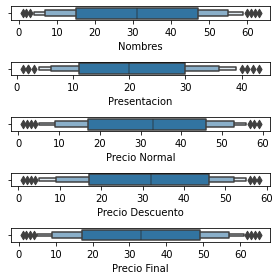

In [37]:
##Mediante gráficas buscaremos comportamientos o patrones de interes
fig, axs = plt.subplots(5, figsize=(4,4))
# indicar la posicion de la columna a evaluar ax=axs[1]
plt1 = sns.boxenplot(df['Nombres'], ax=axs[0])
plt2 = sns.boxenplot(df['Presentacion'], ax=axs[1])
plt3 = sns.boxenplot(df['Precio Normal'], ax=axs[2])
plt4 = sns.boxenplot(df['Precio Descuento'], ax=axs[3])
plt5 = sns.boxenplot(df['Precio Final'], ax=axs[4])

plt.tight_layout()

(array([[ 9.,  6.,  7.,  6.,  6.,  7.,  6.,  7.,  6.,  5.],
        [11.,  9., 15.,  7.,  9., 10.,  4.,  0.,  0.,  0.],
        [ 7.,  6.,  7.,  6.,  6.,  8.,  7.,  9.,  8.,  1.],
        [ 7.,  6.,  7.,  7.,  6.,  8.,  7., 10.,  7.,  0.],
        [ 7.,  6.,  7.,  6.,  6.,  7.,  6.,  7.,  6.,  7.]]),
 array([ 1. ,  7.4, 13.8, 20.2, 26.6, 33. , 39.4, 45.8, 52.2, 58.6, 65. ]),
 <a list of 5 BarContainer objects>)

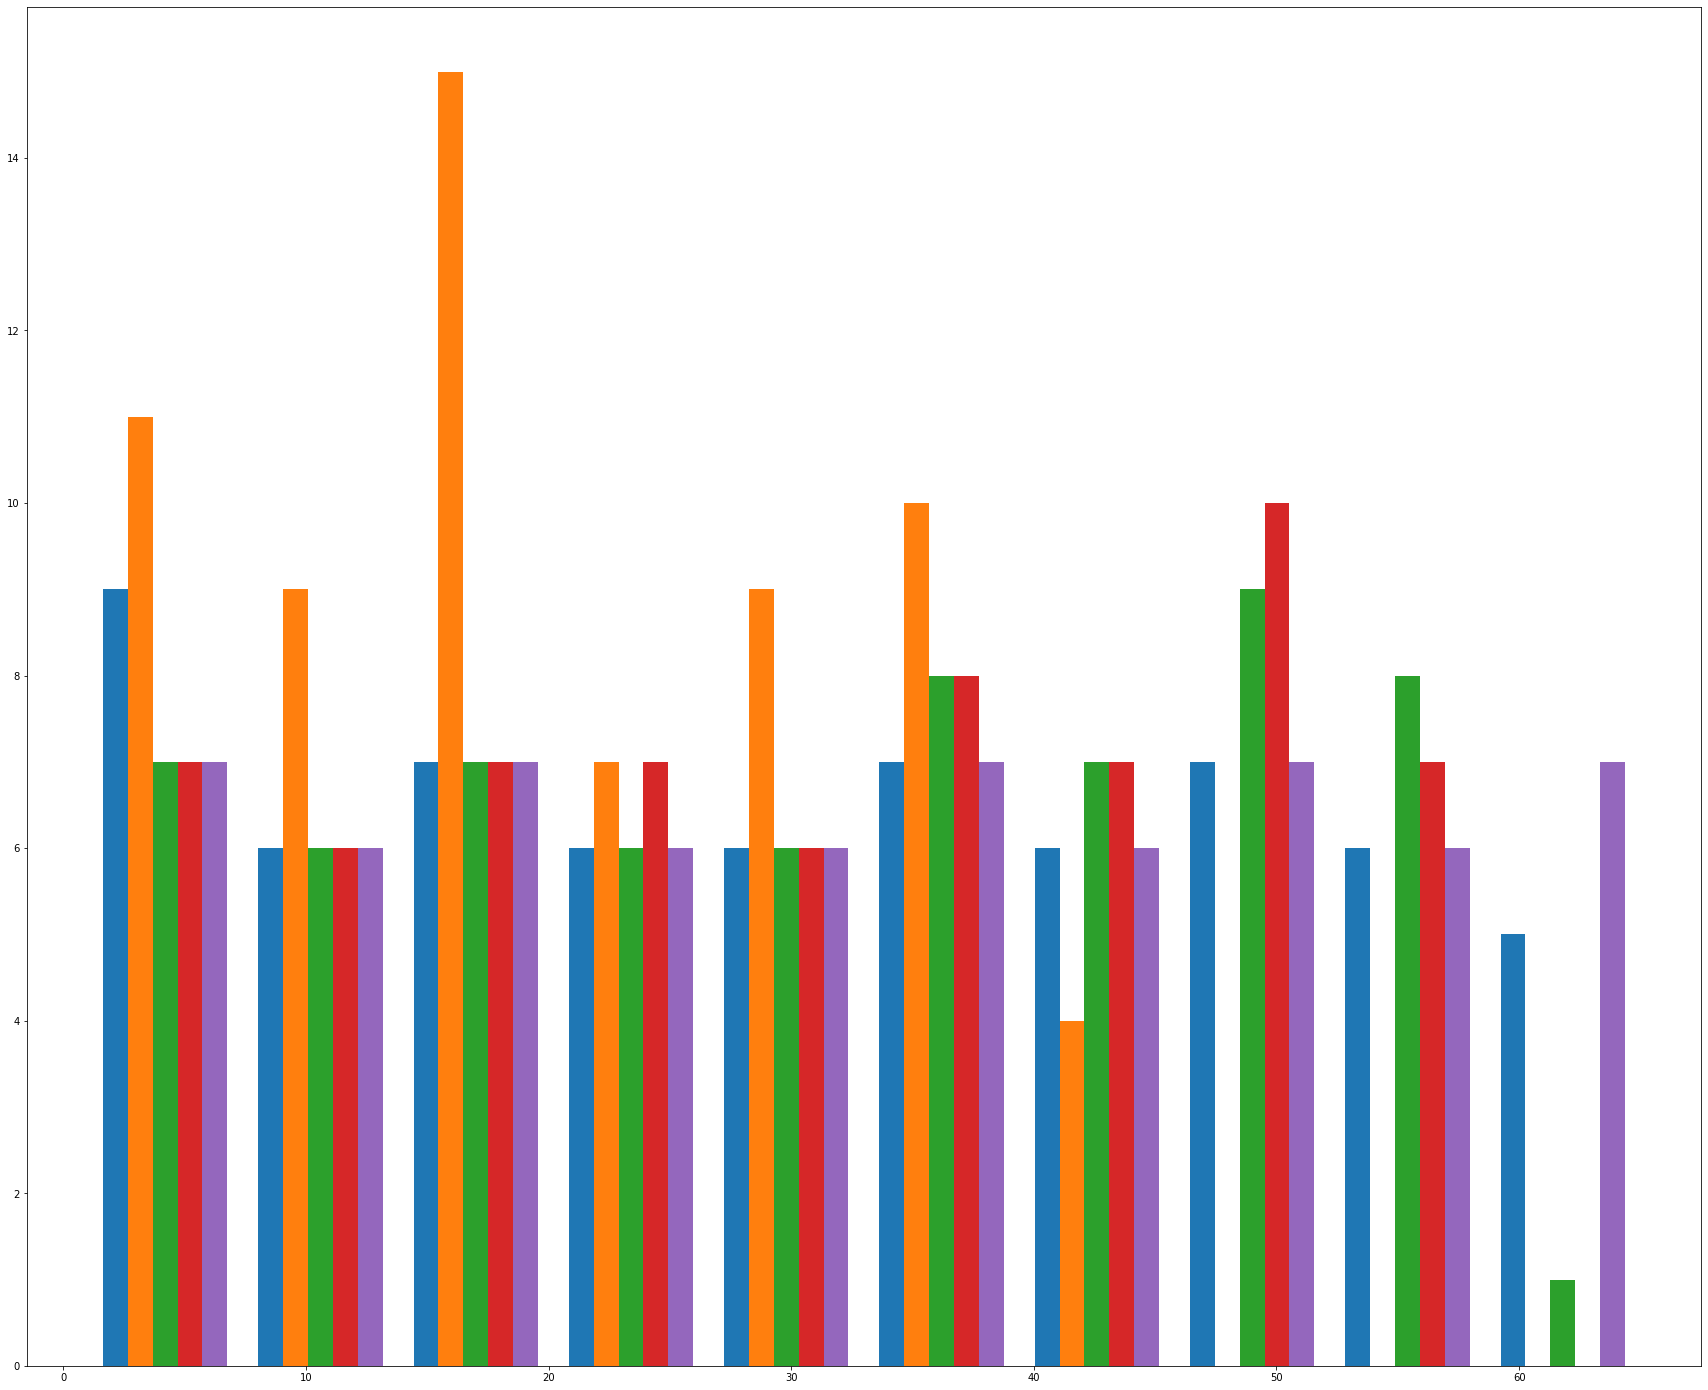

In [38]:
#normalizamos
def normalizar(dataset):
    return dataset.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

datasetN = normalizar(df)
plt.hist(df)

(array([2., 0., 0., 0., 1., 0., 0., 0., 0., 2.]),
 array([-1.66613723, -1.64908744, -1.63203766, -1.61498787, -1.59793809,
        -1.5808883 , -1.56383852, -1.54678873, -1.52973895, -1.51268916,
        -1.49563938]),
 <BarContainer object of 10 artists>)

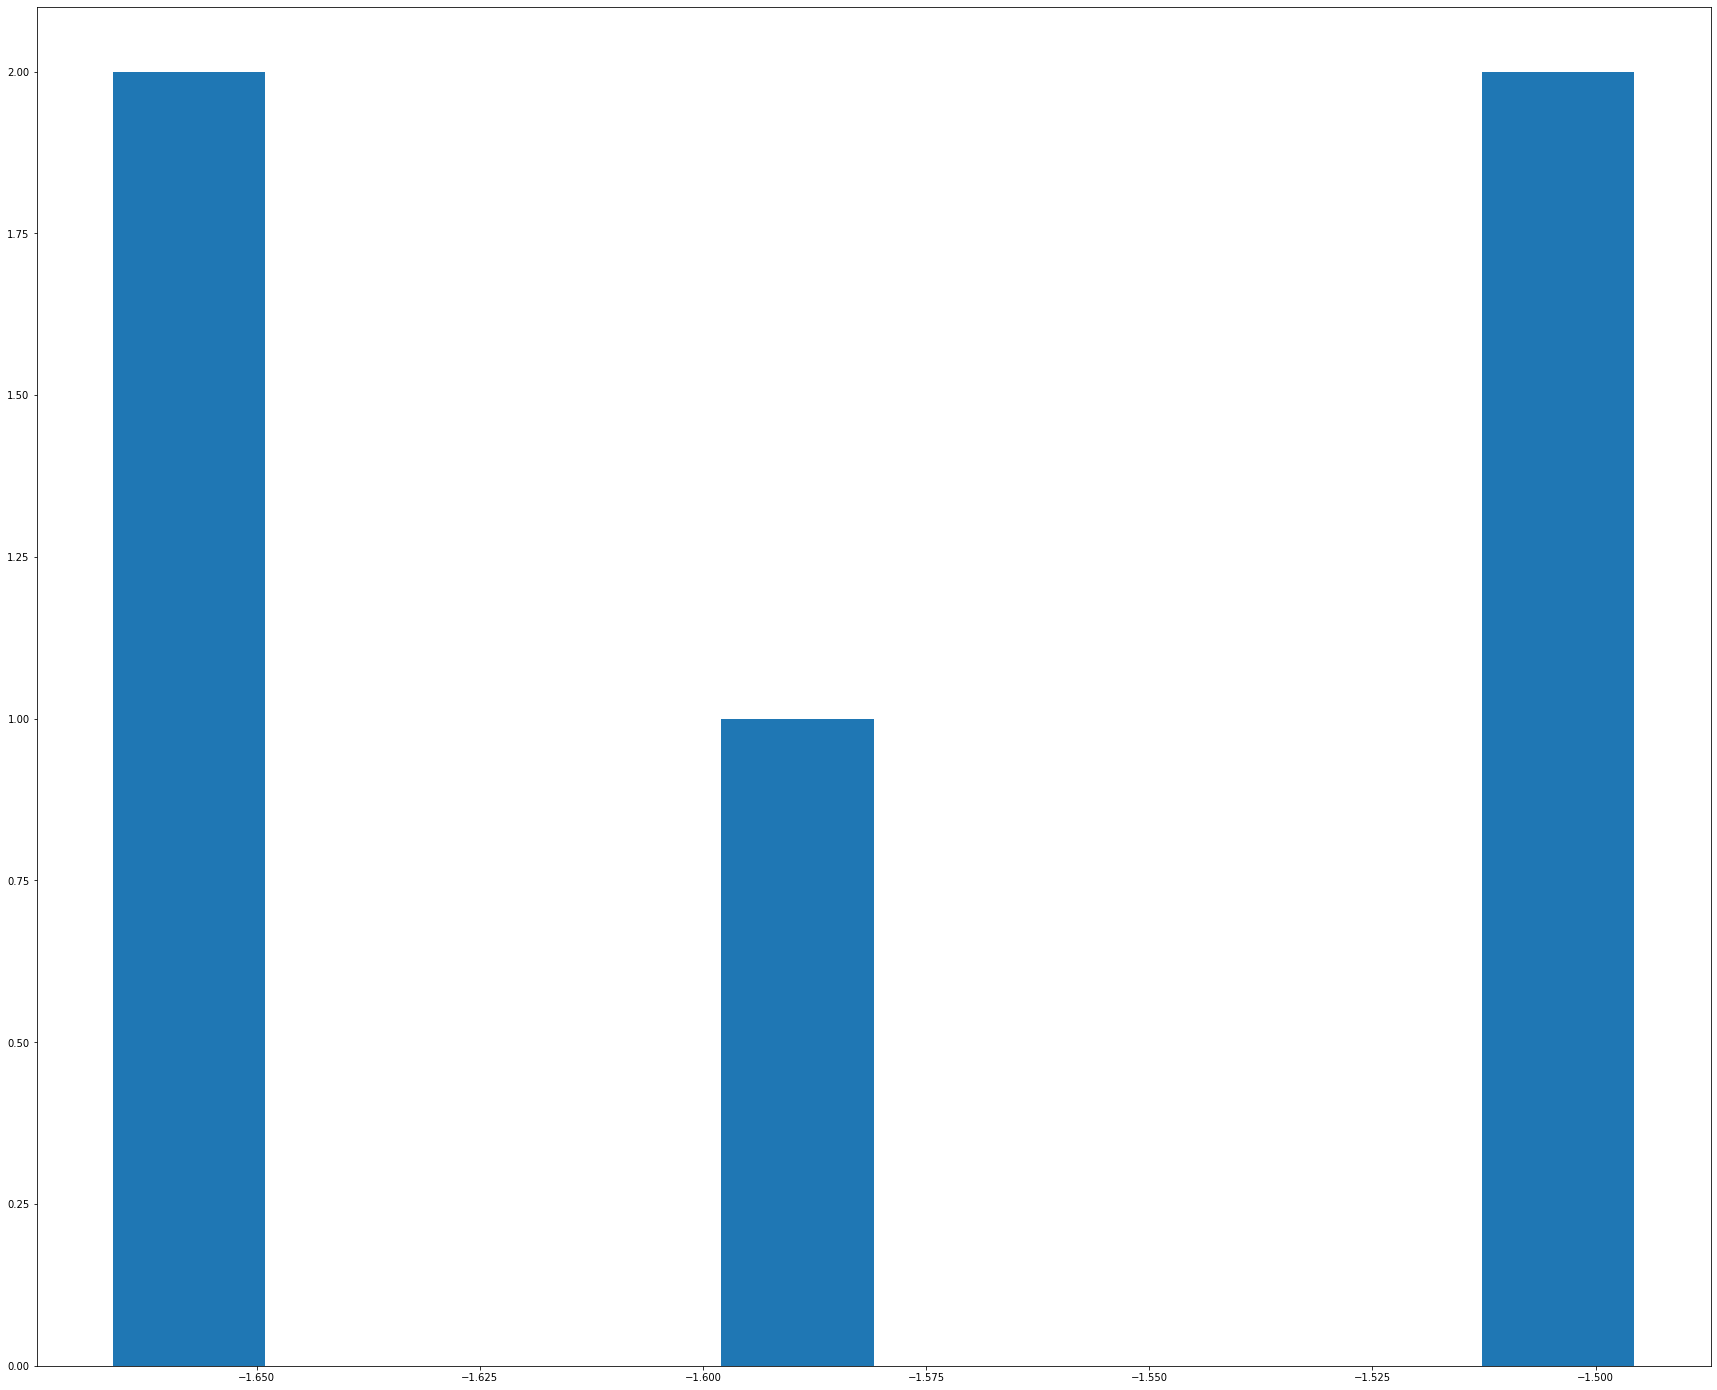

In [39]:
plt.hist(datasetN.iloc[2])

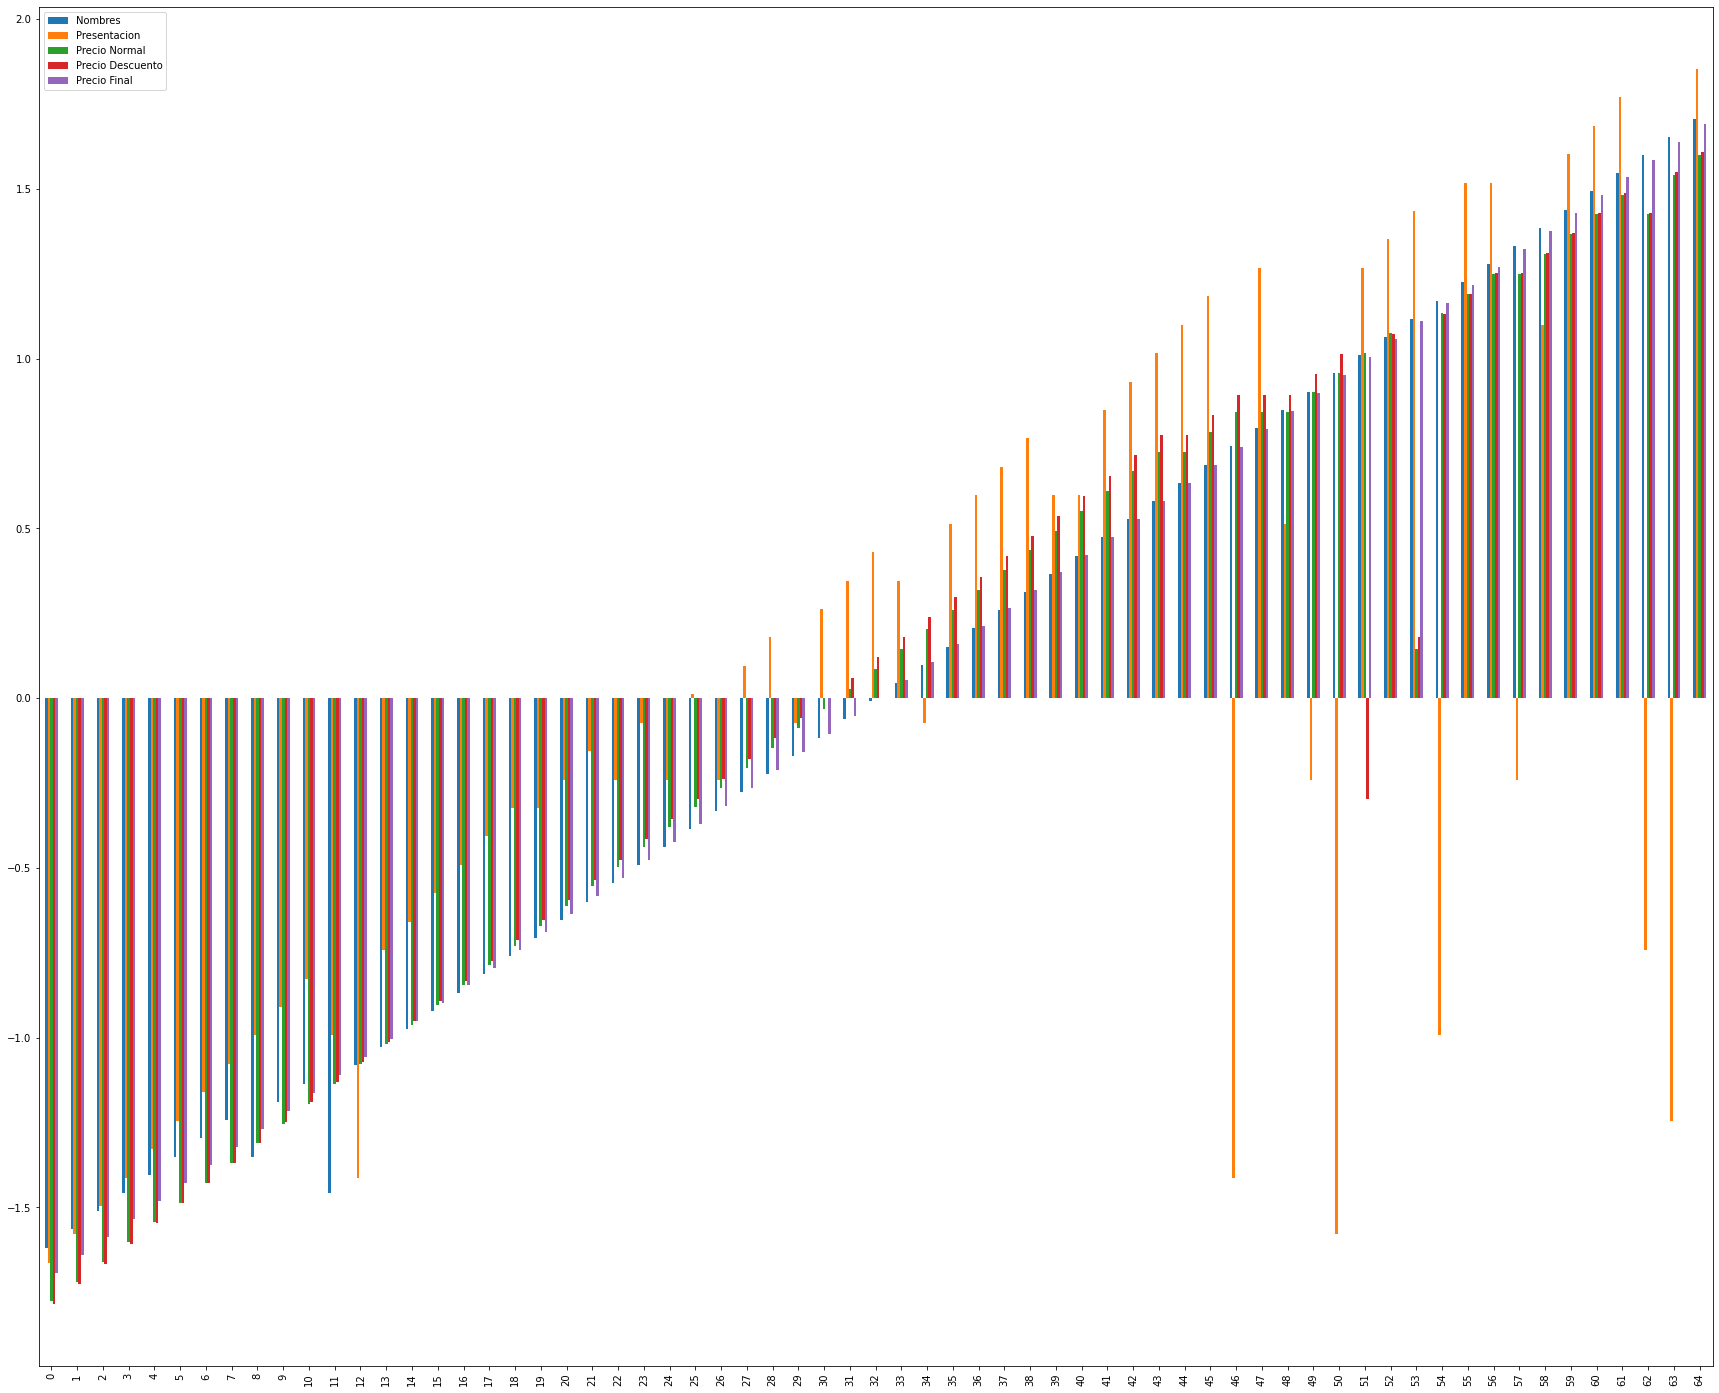

In [40]:
datasetN.plot(kind='bar');

<AxesSubplot:title={'center':'Analisis of data'}>

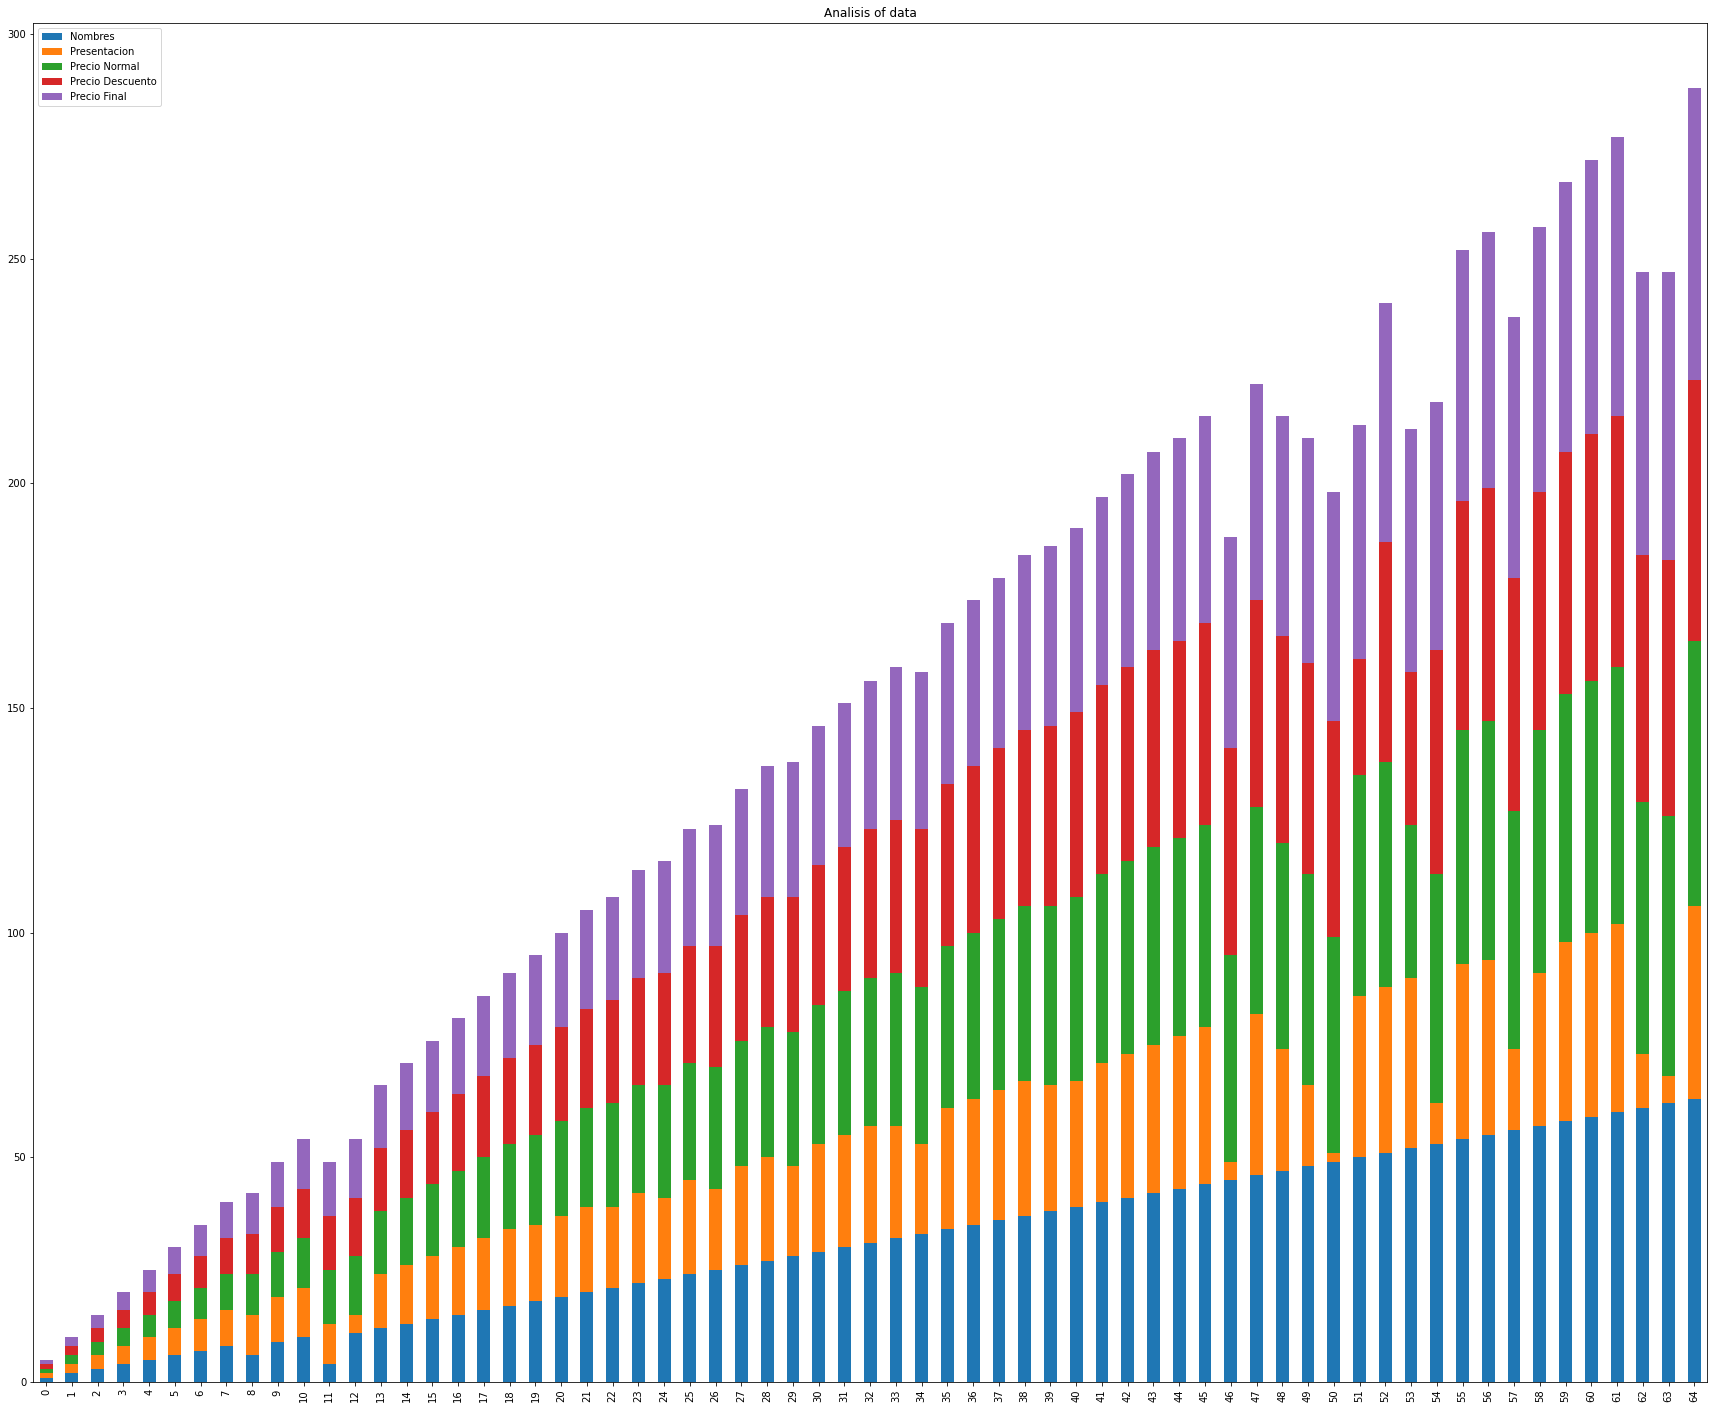

In [41]:
my_df = pd.DataFrame(df)
my_df.plot(kind='bar',stacked=True,title="Analisis of data")

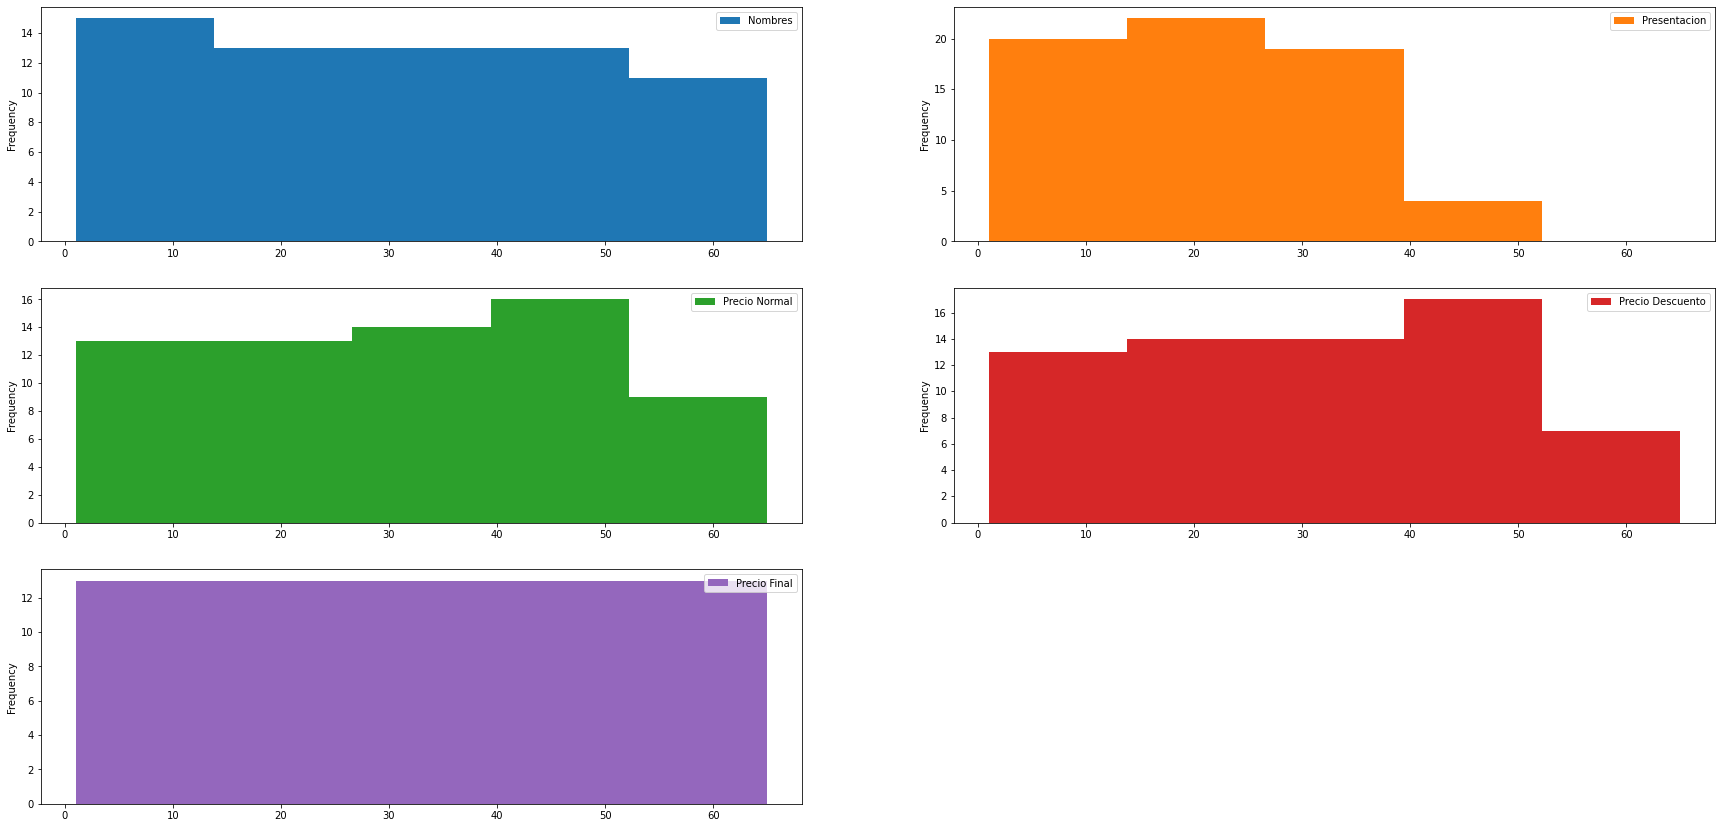

In [42]:
##aplicamos de nuevo los histogramas
#establecemos un tamaño para la grafica
plt.rcParams['figure.figsize']=(30,25)
##establecemos las caracteristicas y otors aspectos de la grafica
df.plot(kind='hist', bins=5, subplots=True, layout=(5,2), sharex=False, sharey=False)
#moestramos los resultados
plt.show()

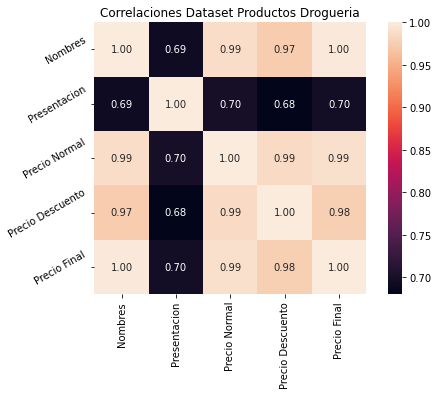

In [43]:
correlacion = df.corr()
plt.figure(figsize=(8,5))
plt.title('Correlaciones Dataset Productos Drogueria')
a = sns.heatmap(correlacion, square=True, annot=True, fmt='.2f', linecolor='blue')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

In [50]:
zz['Nombres']=zz['Nombres'].astype(str)
zz['Presentacion']=zz['Presentacion'].astype(str)
zz['Precio Normal']=zz['Precio Normal'].astype(str)
zz['Precio Descuento']=zz['Precio Descuento'].astype(str)
zz['Precio Final']=zz['Precio Final'].astype(str)
zz.info()
zz.to_excel('Datos_Medina.xlsx',index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Nombres           65 non-null     object
 1   Presentacion      65 non-null     object
 2   Precio Normal     65 non-null     object
 3   Precio Descuento  65 non-null     object
 4   Precio Final      65 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB
